<a href="https://colab.research.google.com/github/Anubhav1107/First_One/blob/master/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py


--2020-01-29 12:48:50--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]   2.75K  --.-KB/s    in 0s      

2020-01-29 12:48:50 (103 MB/s) - ‘helper.py’ saved [2813/2813]



In [0]:
import numpy as np
import pandas as pd
import helper
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [0]:
from torchvision import datasets, transforms

In [5]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

9920512it [00:00, 20586858.22it/s]                            


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


32768it [00:00, 302475.80it/s]                           
0it [00:00, ?it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


1654784it [00:00, 5203538.63it/s]                           
8192it [00:00, 129907.44it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw
Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw
Processing...
Done!


In [6]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


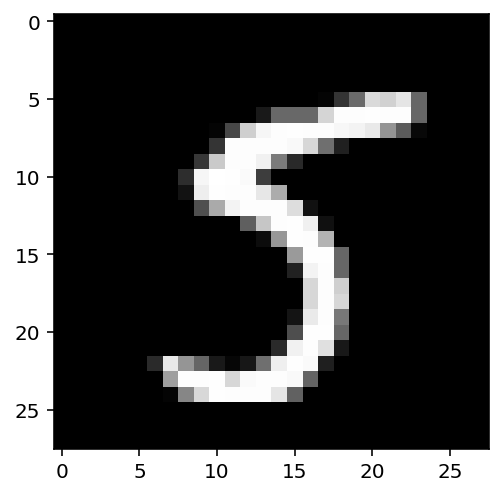

In [0]:
plt.imshow(images[0].numpy().squeeze(),cmap='Greys_r')

In [0]:
#Flatten the images and then build the network with 784 input units and 256 units and 10 output

In [0]:
def activation(x):
  return 1/(1+torch.exp(-x))


#Flat the input images
input = images.view(images.shape[0],-1)

#Create paramteres

w1= torch.randn(784,256)
b1 = torch.rand(256)

w2 =torch.randn(256,10)
b2 = torch.randn(10)

h = activation(torch.mm(input, w1)+b1)

output = activation(torch.mm(h, w2)+b2)

In [0]:
def softmax(x):

  return torch.exp(x)/torch.sum(torch.exp(x),dim=1).view(-1,1)

probabilities = softmax(output)

print(probabilities.shape)

print(probabilities.sum(dim=1))


torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [0]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [0]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [0]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x

In [0]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()

    #Inputs to hidden layer transfrmatuon
    self.fc1 = nn.Linear(784,128)

    self.fc2 = nn.Linear(128,64)

    self.fc3 = nn.Linear(64, 10)

    self.relu = nn.ReLU()

    self.softmax = nn.Softmax(dim=1)


  def forward(self, x):
    x = self.fc1(x)

    x = F.relu(x)

    x = self.fc2(x)

    x = F.relu(x)


    x = self.fc3(x)

    x = F.softmax(x)

    return x

In [0]:
model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


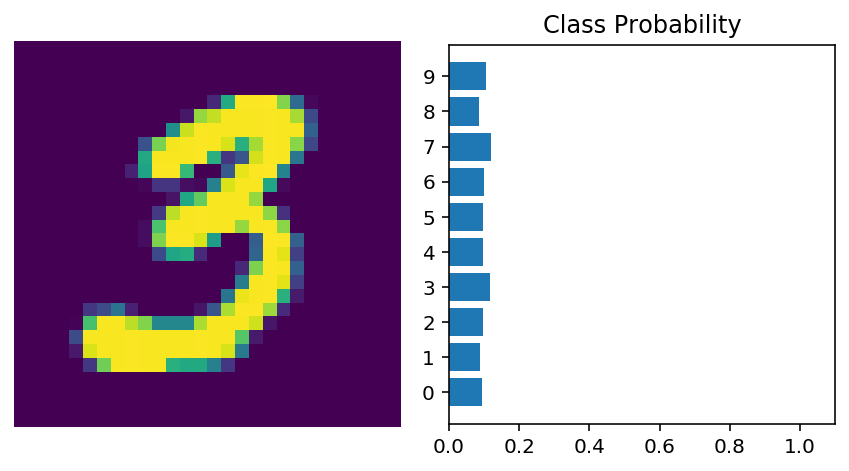

In [0]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]
helper.view_classify(img.view(1, 28, 28), ps)

In [0]:
cpy intro-to-pytorch/Part 3 - Training Neural Networks (Solution).ipynb

SyntaxError: ignored

In [0]:
import torch
from torch import nn
import torch.nn.functional as  F 
from torchvision import datasets, transforms

In [0]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)


  0%|          | 0/9912422 [00:00<?, ?it/s]

9920512it [00:00, 21618251.53it/s]                            


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


32768it [00:00, 320683.73it/s]                           
0it [00:00, ?it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


1654784it [00:00, 4779264.08it/s]                           
8192it [00:00, 116347.09it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw
Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw
Processing...
Done!


In [0]:
#To build a  feed forward newtwork
model = nn.Sequential(nn.Linear(784,128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,10))


#Define the loss
criterion = nn.CrossEntropyLoss()

# Get our data
images, label = next(iter(trainloader))
#Flatten images
images = images.view(images.shape[0], -1)
#Forward pass, get our logits
logits = model(images)

#Calculate the loss with logits and labels
loss = criterion(logits, label)


In [0]:
loss

tensor(2.3045, grad_fn=<NllLossBackward>)

In [7]:
#To build a  feed forward newtwork
model = nn.Sequential(nn.Linear(784,128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.LogSoftmax(dim=1))


#Define the loss
criterion = nn.NLLLoss()

# Get our data
images, label = next(iter(trainloader))
#Flatten images
images = images.view(images.shape[0], -1)
#Forward pass, get our logits
logits = model(images)

#Calculate the loss with logits and labels
loss = criterion(logits, label)

print(loss)


tensor(2.3179, grad_fn=<NllLossBackward>)


In [0]:
#Autograd
import torch

x = torch.randn(2,2, requires_grad =True)



In [9]:
x


tensor([[-0.0151, -0.4822],
        [ 0.0794,  1.1399]], requires_grad=True)

In [10]:
y =x**2
print(y)

tensor([[2.2867e-04, 2.3249e-01],
        [6.2972e-03, 1.2993e+00]], grad_fn=<PowBackward0>)


In [11]:
y.grad_fn

In [12]:
z = y.mean()
print(z)

tensor(0.3846, grad_fn=<MeanBackward0>)


In [0]:
z.backward()

In [14]:
print(x.grad)
print(x/2)

tensor([[-0.0076, -0.2411],
        [ 0.0397,  0.5699]])
tensor([[-0.0076, -0.2411],
        [ 0.0397,  0.5699]], grad_fn=<DivBackward0>)


In [0]:

#Loss and autograd together

In [15]:
print("Before backward pass:",model[0].weight.grad)

loss.backward()

print('After backwards pass:',model[0].weight.grad)

Before backward pass: None
After backwards pass: tensor([[-0.0008, -0.0008, -0.0008,  ..., -0.0008, -0.0008, -0.0008],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0009, -0.0009, -0.0009,  ..., -0.0009, -0.0009, -0.0009],
        ...,
        [-0.0011, -0.0011, -0.0011,  ..., -0.0011, -0.0011, -0.0011],
        [ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002],
        [ 0.0017,  0.0017,  0.0017,  ...,  0.0017,  0.0017,  0.0017]])


In [0]:
#Training the network
from torch import optim

In [18]:
optimizer  = optim.SGD(model.parameters(),lr=0.01)
#General process of pytorch

print("Initial Weight:\n",model[0].weight)

images,label = next(iter(trainloader))
images.resize_(64,784)

#Clear the gradients because they are accumulated

optimizer.zero_grad()

#Read the comment

output = model(images)


loss = criterion(output, labels)

loss.backward()

print("Updated weights:\n",model[0].weight.grad)


Initial Weight:
 Parameter containing:
tensor([[-0.0186, -0.0155, -0.0128,  ...,  0.0268, -0.0316, -0.0059],
        [-0.0295, -0.0293,  0.0099,  ...,  0.0017,  0.0078,  0.0239],
        [ 0.0267, -0.0025, -0.0081,  ...,  0.0063, -0.0160, -0.0335],
        ...,
        [ 0.0064, -0.0295, -0.0041,  ..., -0.0099, -0.0257, -0.0349],
        [ 0.0266,  0.0325, -0.0140,  ...,  0.0037,  0.0317, -0.0083],
        [-0.0344, -0.0093, -0.0263,  ...,  0.0033,  0.0269, -0.0266]],
       requires_grad=True)
Updated weights:
 tensor([[-2.9262e-04, -2.9262e-04, -2.9262e-04,  ..., -2.9262e-04,
         -2.9262e-04, -2.9262e-04],
        [ 7.7276e-06,  7.7276e-06,  7.7276e-06,  ...,  7.7276e-06,
          7.7276e-06,  7.7276e-06],
        [ 2.2525e-03,  2.2525e-03,  2.2525e-03,  ...,  2.2525e-03,
          2.2525e-03,  2.2525e-03],
        ...,
        [-5.3893e-04, -5.3893e-04, -5.3893e-04,  ..., -5.3893e-04,
         -5.3893e-04, -5.3893e-04],
        [-2.1618e-03, -2.1618e-03, -2.1618e-03,  ..., -2.

In [0]:
#Finished Finally
#learned a lot of thing
